# Python for Data Science: Tools for Survival

### Instructor: Soubhik Barari

#### (with solutions)

Welcome! This Jupyter notebook serves as a walk-through of the most essential Python data science tools. Assuming that you have some level of proficiency with the **`R`** programming language and elementary data analysis, this notebook will get you up to speed on how to work with "equivalent" functionalities in Python.

<a class="anchor" id="toc"></a>
### <u>**Table of Contents**</u>

1. [**`NumPy`**](#numpy):&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; all things linear algebra, probability, statistics
2. [**`Pandas`**](#pandas):&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; data structures and analysis
3. [**`Matplotlib`**](#matplotlib):&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; highly flexible 2D and 3D plotting
4. [**`Scikit-learn`**](#scikit-learn): &nbsp;machine learning made easy

### Importing Third-Party Libraries in Python

Using the **`numpy`** package as an example --

**[A.]** How to import a *package*:

In [ ]:
import numpy                                          # WAY 1
m = numpy.mean([1,2,3,4])
x = numpy.random.randint(1)

import numpy as np                                    # WAY 2 (nickamed)
m = np.mean([1,2,3,4])
x = np.random.randint(1)

**[B.]** How to import *specific modules*:

In [ ]:
import numpy.random as nrt                            # WAY 1 (line-by-line module import)
import numpy.linalg as nla
x = nrt.randint(1)

from numpy import random as nrt, linalg as nla        # WAY 2 (in-line import)
x = nrt.randint(1)

from numpy import *                                   # WAY 3 (import all modules)
x = random.randint(1)

**[C.]** How to import *specific classes or functions*:

In [9]:
from numpy.random import randint, randn               # WAY 1 (in-line import)
x = randint(1)

from numpy.random import randint as rint, randn as rn # WAY 2 (in-line import, nicknamed)
x = rint(1)

As a practical example, below is a crucial import for Jupyter notebooks, allowing us to "prettily" display objects as output!

In [10]:
from IPython.display import display

## 1. [`NumPy`](http://www.numpy.org/): all things linear algebra, probability, statistics<a class="anchor" id="numpy"></a>

> **NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

> * A powerful N-dimensional array object
> * Sophisticated (broadcasting) functions
> * Tools for integrating C/C++ and Fortran code
> * Useful linear algebra, Fourier transform, and random number capabilities
> Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

![NumPy Data Science Nodes](imgs/datasci-dag-np.png)

**`R`** equivalents: **`matrix`**, **`vector`**, **`rbind`**, **`cbind`**, **`solve`**, **`diag`**, **`chol`**, etc.

In [11]:
import numpy as np
np.random.seed(17806)  # SEED for reproducibility

### 1.1. Creating arrays

In [12]:
W = np.ones(5)
Z = np.zeros(10)

In [13]:
x1 = np.random.randint(10, size=6)          # ONE-dimensional array
x2 = np.random.randint(10, size=(3, 4))     # TWO-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # THREE-dimensional array

In [14]:
print "x3 ndim: ", x3.ndim
print "x3 shape:", x3.shape
print "x3 size: ", x3.size

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [15]:
display(np.arange(0, 1, 0.1))

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

**TIP:** You can "force" the creation of a matrix, however this is not recommended. The most flexible type to stick with is the `array` type.

In [16]:
b = np.mat('1 2; 3 4')

### 1.2. Indexing / slicing / filtering an array

All arrays/matrices are filtered using the syntax `X[row, col]`:

In [17]:
x1[4]

7

In [18]:
x2[0, 0]

2

In [19]:
x3[:3, 3:]

array([[[8, 8, 5, 4, 8]],

       [[6, 3, 5, 3, 4]],

       [[4, 0, 2, 1, 9]]])

In [20]:
# Boolean mask
x1 < 6

array([ True,  True,  True, False, False, False], dtype=bool)

In [21]:
# How many values less than 6?
np.count_nonzero(x1 < 6)

3

In [22]:
# How many values less than 6 in each row?
np.sum(x2 < 6, axis=1)

array([4, 2, 2])

In [23]:
# Sum of all elements < 6
np.sum(x3 < 6)

39

### 1.3. Shaping / joining

In [24]:
np.arange(1, 26).reshape((5,5))

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [25]:
# CONCATENATE an arbitrary no. of arrays along an existing axis
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

print "By row:\n", np.concatenate((a, b), axis=0)
print "By col:\n", np.concatenate((a, b.T), axis=1)

By row:
[[1 2]
 [3 4]
 [5 6]]
By col:
[[1 2 5]
 [3 4 6]]


In [26]:
# VERTICALLY STACK an arbitrary no. of arrays
np.vstack([a, b, a, b])

array([[1, 2],
       [3, 4],
       [5, 6],
       [1, 2],
       [3, 4],
       [5, 6]])

In [27]:
# HORIZONTALLY STACK an arbitrary no. of arrays
np.hstack([a, b.T, a, b.T])

array([[1, 2, 5, 1, 2, 5],
       [3, 4, 6, 3, 4, 6]])

Refer to the full list of [**matrix concatenation methods**](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html).

### 1.4. Linear algebra

In [28]:
# PRODUCTS
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])

print "x =",x
print "y =",y
print "DOT product:\n",np.dot(x,y)
print "INNER product:\n",np.inner(x,y)
print "OUTER product:\n",np.outer(x,y)

x = [1 2 3 4]
y = [5 6 7 8]
DOT product:
70
INNER product:
70
OUTER product:
[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]


**TIP:** try using arithmetic operators with numpy arrays!

In [30]:
# DECOMPOSITIONS
d = np.random.randn(2, 2)
w, v = np.linalg.eig(d)
U, s, V = np.linalg.svd(d)

print "d =\n",d
print "EIGEN values:",w
print "SINGULAR values:",s

d =
[[-1.3678435  -2.06328093]
 [ 0.66199857  0.2151528 ]]
EIGEN values: [-0.57634535+0.85989517j -0.57634535-0.85989517j]
SINGULAR values: [ 2.53656979  0.42245779]


**TIP:** note that if a Python function returns a list or a tuple, you can naturally "unravel" by assigning each returning element to a different object!

In [31]:
# INVERSIONS
d_inv = np.linalg.inv(d)

print "d^{-1}=\n",d_inv

d^{-1}=
[[ 0.20077834  1.92543219]
 [-0.61777014 -1.27645725]]


### 1.5. Sampling

In [32]:
import numpy.random as npr

X0 = npr.random_sample(size=5)                       # CONTINUOUS Uniform
X1 = npr.uniform(low=1, high=5, size=5)              # DISCRETE Uniform
X2 = npr.standard_normal(size=5)
X3 = npr.multivariate_normal(mean=(5,5), cov=[[1,0], [0,100]], size=10)
X4 = npr.binomial(n=5, p=0.5, size=1000)
X5 = npr.poisson(lam=5, size=15)
X6 = npr.beta(a=4, b=5, size=(2,2))

### 1.6. Statistics

In [33]:
# Try setting `X` to any of the above samples!
X = X0          

print "Median:",np.median(X)
print "Mean:",np.mean(X)
print "Std:",np.std(X0)
print "Var:",np.var(X0)
print "95th %:",np.percentile(X0, q=95)

hist = np.histogram(X0)

Median: 0.887968471366
Mean: 0.732185773611
Std: 0.244333340531
Var: 0.0596987812953
95th %: 0.962194613452


### 1.7. **Exercise:**

Recall the formula for vanilla linear regression, given a response vector $y$ and a predictor matrix $X$:

$$y = X \beta + \epsilon$$

The Ordinary Least Squares (OLS) solution for $\beta$ which minimizes the sum of squared residuals is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Write a function that takes an predictor $X$ matrix a response $y$ vector and returns the OLS solution $\hat{\beta}$.

*Extra credit:* What does OLS assume about $X$ and $y$ in order to solve for $\beta$? Write in approppriate checks in the form of conditional statements or **`try/except`** clauses.

### <div style="color:red">Solution:</div>

In [78]:
def ols(X, y):
    # ASSUMPTION 0: n(X) = n(y)
    if X.shape[0] != y.shape[0]:
        raise Exception("n(X) != n(y)")
    # ASSUMPTION 1: N > M
    if X.shape[0] <= X.shape[1]:
        raise Exception("N <= M")
    # ASSUMPTION 2: linear independence
    if np.linalg.matrix_rank(X_) != X.shape[1]:
        raise Exception("not linearly independent")
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

# TEST
X_ = np.array(
   [[1,3,5],
    [1,1,0],
    [1,1,2],
    [1,3,3]]
)

y_ = np.array([3,5,7,-3]).T

ols(X_, y_)

array([10., -6.,  2.])

### <div style="color:purple">SUMMARY</div>

- The **`numpy`** packages services most of your numerical and statistical needs (things that are already part of the **`R`** basis).


- Same rules about **`list`** indexing/slicing apply to **`numpy`** objects.


- Many different ways of joining/merging vectors/matrices together.


- Unlike in **`R`**, the best practice is to *just* stick to the **`array`** type. No need for a million different ways to create vectors/matrices!
<br><br>
<div style="color:gray; text-align:right; font-weight:bold;">[BACK TO TOP  &#8593;](#toc)</div>

## 2. [`Pandas`](https://pandas.pydata.org/): data structures and analysis

> **Pandas** enables you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R. Some highlights:
> * A fast and efficient DataFrame object for data manipulation with integrated indexing;
> * Tools for reading and writing data between in-memory data structures and different formats: CSV, text files, Excel, SQL, etc.
> * Time series-functionality
> * Highly optimized for performance, with critical code paths written in Cython or C.

![Pandas Data Science Nodes](imgs/datasci-dag-pd.png)

**`R`** equivalents: **`data.frame`**, **`dplyr`**

In [79]:
import pandas as pd

### 2.1. Reading in data

In [80]:
pd.read_csv("data/state2wages.csv").head()

,StateName,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,$6.55,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25
1,Alaska,$7.15,$7.25,$7.75,$7.75,$7.75,$7.75,$7.75,$8.75,$9.75,$9.80,$9.84
2,Arizona,$6.90,$7.25,$7.25,$7.35,$7.65,$7.80,$7.90,$8.05,$8.05,$10.00,$10.50
3,Arkansas,$6.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.50,$8.00,$8.50,$8.50
4,California,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$9.00,$9.00,$10.00,$10.50,$11.00


In [81]:
pd.read_excel("data/state2wages.xlsx", sheet=0).head()

,StateName,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,6.55,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
1,Alaska,7.15,7.25,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84
2,Arizona,6.90,7.25,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.5
3,Arkansas,6.25,7.25,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.5
4,California,8.00,8.00,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.001


In [82]:
pd.read_json("data/state2wages.json", orient="index").head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Alabama,$6.55,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25
Alaska,$7.15,$7.25,$7.75,$7.75,$7.75,$7.75,$7.75,$8.75,$9.75,$9.80,$9.84
Arizona,$6.90,$7.25,$7.25,$7.35,$7.65,$7.80,$7.90,$8.05,$8.05,$10.00,$10.50
Arkansas,$6.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.50,$8.00,$8.50,$8.50
California,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$9.00,$9.00,$10.00,$10.50,$11.00


**TIP:** The **`.describe()`** method can be used to create summary statistics on any dataframe.

### 2.2. Indexing / slicing / filtering a dataframe

The **index** of your dataframe uniquely "names" each row and will determine how you filter rows. By default, the index of any dataframe is simply an array of row numbers assigned during creation.

In [83]:
df = pd.read_csv("data/state2wages.csv")
display(df.index)

RangeIndex(start=0, stop=52, step=1)

Although we can stick with the range index, we may also choose **`"State"`** to be our index, since it uniquely names each row:

In [84]:
df = df.set_index(["StateName"], drop=True)
display(df.head(5))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
StateName,,,,,,,,,,,
Alabama,$6.55,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25
Alaska,$7.15,$7.25,$7.75,$7.75,$7.75,$7.75,$7.75,$8.75,$9.75,$9.80,$9.84
Arizona,$6.90,$7.25,$7.25,$7.35,$7.65,$7.80,$7.90,$8.05,$8.05,$10.00,$10.50
Arkansas,$6.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.50,$8.00,$8.50,$8.50
California,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$9.00,$9.00,$10.00,$10.50,$11.00


**TIP:** If you want to reset your dataframe's index to simply enumerate row number, use the **`.reset_index()`** function.

E.g. **`df = df.reset_index()`**

The current index on the dataframe will just turn into another column.

In [85]:
# "quick view"
display(df[["2008", "2018"]].head())

,2008,2018
StateName,,
Alabama,$6.55,$7.25
Alaska,$7.15,$9.84
Arizona,$6.90,$10.50
Arkansas,$6.25,$8.50
California,$8.00,$11.00


**TIP:** Just like for Python dictionaries, you can access a dataframe column (e.g. with name **`Col`**) using **`df.Col`** instead of **`df["Col"]`**.

Based on a dataframe's index, you have the following ways of filtering the dataframe beyond just a "quick view":

In [86]:
# .iloc : Filter on POSITION
df.iloc[1:5, :5]

,2008,2009,2010,2011,2012
StateName,,,,,
Alaska,$7.15,$7.25,$7.75,$7.75,$7.75
Arizona,$6.90,$7.25,$7.25,$7.35,$7.65
Arkansas,$6.25,$7.25,$7.25,$7.25,$7.25
California,$8.00,$8.00,$8.00,$8.00,$8.00


In [87]:
# .loc : Filter on LABEL
df.loc["Massachusetts":"Nebraska", ["2009", "2010"]]

,2009,2010
StateName,,
Massachusetts,$8.00,$8.00
Michigan,$7.40,$7.40
Minnesota,$6.15,$6.15
Mississippi,$7.25,$7.25
Missouri,$7.25,$7.25
Montana,$7.25,$7.25
Nebraska,$7.25,$7.25


In [88]:
# .ix : Filter on either POSITION or LABEL
df.ix[["Massachusetts", "California"], 0:10]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
StateName,,,,,,,,,,
Massachusetts,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$9.00,$10.00,$11.00
California,$8.00,$8.00,$8.00,$8.00,$8.00,$8.00,$9.00,$9.00,$10.00,$10.50


In [89]:
# .[any] : Filter using BOOLEAN array 
df.loc[df.index.str.contains("x"),:]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
StateName,,,,,,,,,,,
New Mexico,$6.50,$7.50,$7.50,$7.50,$7.50,$7.50,$7.50,$7.50,$7.50,$7.50,TBD
Texas,$6.55,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25,$7.25


In [90]:
# Can WRITE as well as READ on filter
df.loc[df.index == "New Mexico", "2018"] = "$7.50"

Use the following table as a guide when deciding which slicing function to use:

#### 2.3.1 <u>Guide to `Pandas` Indexing Functions</u>

<table>
  <tr>
    <th></th>
    <th>**`.iloc` [position-based filter]**</th>
    <th>**`.loc` [label-based filter]**</th>
    <th>**`.ix` [mixed filter]**</th>
  </tr>
  <tr>
    <td>**Row arguments**<br>(df has **`int`** index)</td>
    <td>- Single row's position (**`int`**)<br>- List/array of row positions<br>- Slice of row positions<br>- Bool list/array of row positions to include<br></td>
    <td>- Single row label (**`int`**)<br>- List/array of row integer labels<br>- Slice of row integer labels<br>- Bool list/array of row labels to include<br></td>
    <td>(only **`.loc`** arguments supported)</td>
  </tr>
  <tr>
    <td>**Row arguments**<br>(df has **`str`** index)</td>
    <td>- Single row's position (**`int`**)<br>- List/array of row positions<br>- Slice of row positions<br>- Bool list/array of row positions to include</td>
    <td>- Single row label (**`str`**)<br>- List/array of row string labels<br>- Slice of row string labels<br>- Bool list/array of row labels to include<br></td>
    <td>(checks for **`.loc`** arguments; <br>falls back on **`.iloc`** arguments)</td>
  </tr>
  <tr>
    <td>**Column arguments**</td>
    <td>- Single col's integer position (**`int`**)<br>- List/array of col integer positions<br>- Slice of col positions<br>- Bool list/array of col positions to include<br></td>
    <td>- Single col name (**`str`**)<br>- List/array of col names<br>- Slice of col names<br>- Bool list/array of col names to include</td>
    <td>(checks for **`.loc`** arguments; <br>falls back on **`.iloc`** arguments)</td>
  </tr>
</table>

### 2.3. Data cleaning

In [ ]:
df2 = df.copy()

In [ ]:
# APPLY a fxn to one column
df2["2018"] = df2["2018"].apply(lambda s: s.split(".")[0], 1)
display(df2["2018"].head())

In [ ]:
# APPLY a fxn to multiple columns
df2.ix[:,"2008":"2018"].apply(lambda row: map(round_down, row), axis=1)
display(df2.head())

#### 2.3.1 Exercise:

Run an **`.apply()`** function on **`df`** to convert each string value (e.g. **`"$7.50"`**) to a floating point number rounded to the nearest 10 cents.

#### <div style="color:red">Solution:</div>

In [119]:
df.ix[:,"2008":"2018"] = df.ix[:,"2008":"2018"].apply(lambda row: map(lambda cell: float(cell.strip("$")), row), 1)
display(df.head())

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
StateName,,,,,,,,,,,
Alabama,6.55,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
Alaska,7.15,7.25,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84
Arizona,6.90,7.25,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50
Arkansas,6.25,7.25,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.50
California,8.00,8.00,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00


### 2.4. Merging dataframes

Let's combine our minimum wage data with our (1.) region data and (2.) state party majority data!

In [120]:
wage_df     = df.copy()
party_df    = pd.read_csv("data/state2party2017.csv")
region_df   = pd.read_csv("data/region2states.csv")
state_df    = pd.read_csv("data/code2name.csv")

<div class="container">

    <div class="row" style="font-size:8pt">
      <div class="table-responsive col-lg-2 col-xs-2">
        **`wage_df`:**
        <table border="1" class="dataframe">
          <thead>
            <tr>
              <th></th>
              <th>2018</th>
            </tr>
            <tr>
              <th>State</th>
              <th></th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <th>Alabama</th>
              <td>\$7</td>
            </tr>
            <tr>
              <th>Alaska</th>
              <td>\$9</td>
            </tr>
            <tr>
              <th>Arizona</th>
              <td>\$10</td>
            </tr>
            <tr>
              <th>Arkansas</th>
              <td>\$8</td>
            </tr>
            <tr>
            <th>...</th><td>...</td>
            </tr>
          </tbody>
        </table>
      </div>
      <div class="table-responsive col-lg-2 col-xs-2">
        **`party_df`:**
        <table border="1" class="dataframe">
          <thead>
            <tr>
              <th></th>
              <th>StateName</th>
              <th>Control</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <th>0</th>
              <td>Alabama</td>
              <td>Rep</td>
            </tr>
            <tr>
              <th>1</th>
              <td>Alaska</td>
              <td>Rep</td>
            </tr>
            <tr>
              <th>2</th>
              <td>Arizona</td>
              <td>Rep</td>
            </tr>
            <tr>
              <th>3</th>
              <td>Arkansas</td>
              <td>Rep</td>
            </tr>
            <tr>
              <th>4</th>
              <td>California</td>
              <td>Dem</td>
            </tr>
            <th>...</th><td>...</td><td>...</td>
          </tbody>
        </table>
      </div>
      <div class="table-responsive col-lg-2 col-xs-2">
        **`state_df`:**
          <table border="1" class="dataframe">
              <thead>
                <tr style="text-align: right;">
                  <th></th>
                  <th>StateName</th>
                  <th>StateCode</th>
                </tr>
              </thead>
              <tbody>
                <tr>
                  <th>0</th>
                  <td>Mississippi</td>
                  <td>MS</td>
                </tr>
                <tr>
                  <th>1</th>
                  <td>Oklahoma</td>
                  <td>OK</td>
                </tr>
                <tr>
                  <th>2</th>
                  <td>Delaware</td>
                  <td>DE</td>
                </tr>
                <tr>
                  <th>3</th>
                  <td>Minnesota</td>
                  <td>MN</td>
                </tr>
                <tr>
                  <th>4</th>
                  <td>Illinois</td>
                  <td>IL</td>
                </tr>
                <th>...</th><td>...</td><td>...</td>
              </tbody>
        </table>      
    </div>
    <div class="table-responsive col-lg-2 col-xs-3">
      **`region_df`:**
        <table border="1" class="dataframe">
          <thead>
            <tr style="text-align: right;">
              <th></th>
              <th>StateCode</th>
              <th>Region</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <th>0</th>
              <td>WA</td>
              <td>Pacific</td>
            </tr>
            <tr>
              <th>1</th>
              <td>DE</td>
              <td>South Atlantic</td>
            </tr>
            <tr>
              <th>2</th>
              <td>DC</td>
              <td>South Atlantic</td>
            </tr>
            <tr>
              <th>3</th>
              <td>WI</td>
              <td>East North Central</td>
            </tr>
            <tr>
              <th>4</th>
              <td>WV</td>
              <td>South Atlantic</td>
            </tr>
            <th>...</th><td>...</td><td>...</td>
          </tbody>
    </table>
    </div>
</div>

In [164]:
full_df = wage_df.merge(party_df, left_index=True, right_on="StateName") \
                 .merge(state_df, left_on="StateName", right_on="StateName")
full_df[["StateName", "StateCode", "Seats", "2018"]].head()

,StateName,StateCode,Seats,2018
0,Alabama,AL,140,7.25
1,Alaska,AK,60,9.84
2,Arizona,AZ,90,10.50
3,Arkansas,AR,135,8.50
4,California,CA,120,11.00


In **`pandas`**, you can specify what *kind* of merge to perform using the **`how`** keyword. Below is a visual explanation of different types of merges (more typically called joins):

#### 2.4.1. <u>Visual Guide to Dataframe Joins</u>

<sub>From `The Data Geekery SQL Masterclass`:</sub>

![Visual Guide to Joins](imgs/joins.png "Visual Guide to Joins")

#### 2.4.2. Exercise:

Merge **`full_df`** with **`region_df`** and display the first 5 rows below.

#### <div style="color:red">Solution:</div>

In [165]:
full_df = full_df.merge(region_df, how="left", on="StateCode")
display(full_df.head(5)[["StateCode", "Region", "Control", "SenateDem"]])

,StateCode,Region,Control,SenateDem
0,AL,East South Central,Rep,8.0
1,AK,Pacific,Rep,6.0
2,AZ,Mountain,Rep,13.0
3,AR,West South Central,Rep,9.0
4,CA,Pacific,Dem,27.0


### 2.5. Aggregating data


In [166]:
# Extract max value for a column
full_df["2017"].max()

11.0

In [168]:
# Extract row w/max value for a column
idx_max_2017 = full_df["2017"].idxmax()
full_df.ix[[idx_max_2017],["StateCode", "Region", "2017"]]

,StateCode,Region,2017
20,MA,New England,11.0


In [183]:
# Group rows by party control, 
# extract median for each column
full_df.groupby(["Control"]).median()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Seats,Senate,SenateDem,SenateRep,SenateOther,HouseDem,HouseRep,SenateDemPct,SenateRepPct
Control,,,,,,,,,,,,,,,,,,,,
Dem,7.325,7.525,7.75,7.75,7.75,7.875,8.125,8.565,8.875,9.425,10.10,120,40,25.5,13.0,1.0,53.5,30.0,0.623083,0.376917
Rep,6.550,7.250,7.25,7.25,7.25,7.250,7.250,7.250,7.250,7.250,7.25,146,38,11.0,27.0,1.0,36.0,71.0,0.300000,0.700000
Split,7.250,7.280,7.50,7.50,7.64,7.780,8.000,8.230,8.310,9.300,10.10,186,35,17.0,18.0,NaN,77.0,72.0,0.485714,0.514286


**TIP:** When performing a **`groupby`** operation followed by some sort of aggregation, the resulting dataframe will have the "group" columns set as the index.

In [174]:
# Group rows by party control, 
# extract means for two specific columns
full_df["SenateDemPct"] = full_df.SenateDem / full_df.Senate
full_df["SenateRepPct"] = full_df.SenateRep / full_df.Senate

full_df.groupby(["Control"])[["SenateDemPct", "SenateRepPct"]].mean()

,SenateDemPct,SenateRepPct
Control,,
Dem,0.667201,0.329398
Rep,0.297530,0.700952
Split,0.490476,0.509524


In [184]:
# Group rows by party control and region, 
# extract means for `Seats` in each group using custom function
full_df.groupby(["Control", "Region"]).agg({ "Seats" : lambda l: float(sum(l))/len(l) })

Seats
Control Region                        
Dem     East North Central  177.000000
        Middle Atlantic     166.500000
        Mountain             87.500000
        New England         164.333333
        Pacific             108.250000

### 2.6. Saving data

In [126]:
out_df = full_df.groupby("Control")[["SenateDemPct", "SenateRepPct"]].mean()
out_df.to_csv("state_majority_pct.csv", index=False)

Other output functions include:
* **`.to_json()`**
* **`.to_txt()`**
* **`.to_sql()`**
* **`.to_excel()`**
* **`.to_html()`**
* **`.to_stata()`**

### 2.7. Exercise:

In the previous notebook we analyzed minimum wage data using **`dict`** objects. This time, use **`pandas`** to output which region within *Democrat* states and *Republican* states respectively has the lowest average minimum wage in 2017.

**TIP:** On any dataframe, the function **`.sort_values()`** can be called where the first argument is the column to be sorted by. 

### <div style="color:red">Solution:</div>

In [189]:
# (One possible solution)
## 1. Group rows by party and region, 
##    extract the 2017 mean wage for each group,
##    remove party/region index 
##    -- we have average wages for each region within each party
party_region_max_df = full_df.groupby(["Control", "Region"])["2017"].mean().reset_index()
## 2. Group rows just by party,
##    extract the row index with the min 2017 mean wage for each group,
##    subset the original dataframe on the extracted index using .loc,
##    -- display!
display(party_region_max_df.loc[party_region_max_df.groupby(["Control"])["2017"].idxmin()])

,Control,Region,2017
2,Dem,Mountain,7.875
7,Rep,East South Central,7.250
15,Split,Mountain,9.300


### <div style="color:purple">SUMMARY</div>

- The **`DataFrame`** object in **`pandas`** provides the same functionality as **`R`**'s data frames.


- The most important thing when working with dataframes: **pay attention to what your index is!**


- Indexing/slicing in **`pandas`** is tricky, but precise. When in doubt, just use the **`.ix`** method for Boolean, label, and positional indexing/slicing.


- Columns have functions for aggregation (e.g. **`mean, max, idxmax`**). These same aggregation functions can be applied *within* groups after performing a **`.groupby()`** operation.
<br><br>
<div style="color:gray; text-align:right; font-weight:bold;">[BACK TO TOP  &#8593;](#toc)</div>

## 3. [`Matplotlib`](https://matplotlib.org/index.html): highly flexible 2D and 3D plotting <a class="anchor" id="matplotlib"></a>

> **Matplotlib** is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

![Matplotlib Data Science Nodes](imgs/datasci-dag-mpl.png)

**`R`** equivalents: **`ggplot2`** (Python is better ☺)

In [192]:
import matplotlib as mpl
import matplotlib.pyplot as plt    # Default plotting API

In [193]:
# Need this to display plots in Jupyter 
%matplotlib inline 

### 3.1. Varieties of plots

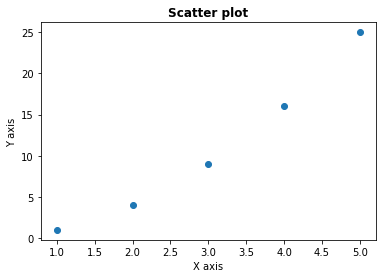

In [194]:
# SCATTER plot
plt.scatter(x=[1,2,3,4,5], y=[1,4,9,16,25], marker="o")
plt.title("Scatter plot", fontweight="bold")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

**TIP:** **`matplotlib`** plotting functions often take in *many* different types of iterable objects as data.

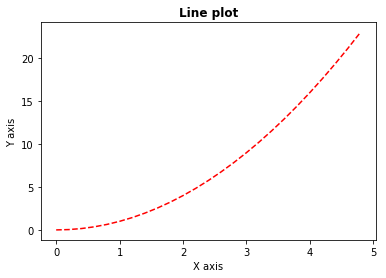

In [195]:
# LINE plot
x = np.arange(0., 5., 0.2)
plt.plot(x, x**2, ls="--", c="r")
plt.title("Line plot", fontweight="bold")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# plt.xlim([1, 4])
# plt.ylim([5, 15])

plt.show()

**TIP:** You can call multiple plotting functions on the same underlying figure.

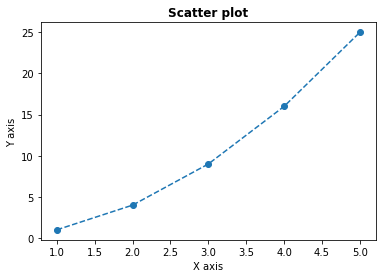

In [196]:
# MIXED plot
plt.scatter([1,2,3,4,5], [1,4,9,16,25], marker="o")
plt.plot([1,2,3,4,5], [1,4,9,16,25], "--")
plt.title("Scatter plot", fontweight="bold")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

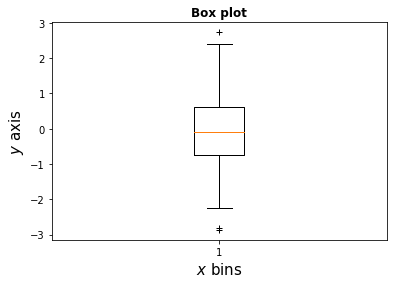

In [197]:
# BOX PLOT
x = np.random.randn(100)
plt.boxplot(x, vert=True, sym="+")
plt.title("Box plot", fontweight="bold")
plt.xlabel("$x$ bins", fontsize=15)
plt.ylabel("$y$ axis", fontsize=15)
plt.show()

Other plotting functions include:
* **`.stackplot()`** - create a stacked area plot
* **`.streamplot()`** - plot vector fields
* **`.imshow()`** - plot images/matrices/heatmaps

### 3.2. Creating and arranging subplots

Every plotting function in **`matplotlib`** uses a figure and a subplot.

* The **figure** object handles sizing, rendering, and arrangement of new subplots.


* The **subplot** object (with class name `AxesSubplot`) handles an individual plot.

The **`.pyplot`** (often stylized to **`.plt`**) maintains a "default" figure and subplot. 

However, when you want to create multiple subplots in one figure *or* draw many figures, create your own using the **`plt.subplots()`** function:

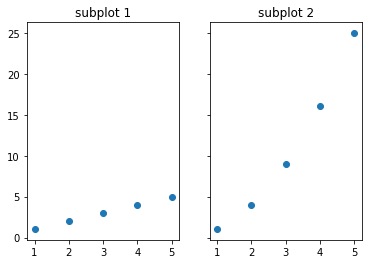

In [198]:
# ROW of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

## Figure adjustments
# fig.subplots_adjust(wspace=0.5)

## Individual subplots 
ax1.scatter([1,2,3,4,5], [1,2,3,4,5])
ax1.set_title("subplot 1")

ax2.scatter([1,2,3,4,5], [1,4,9,16,25])
ax2.set_title("subplot 2")

plt.show()

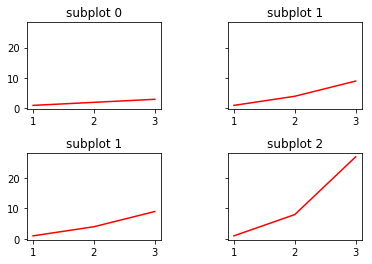

In [199]:
# GRID of subplots
fig, ax_matrix = plt.subplots(2, 2, sharey=True)

fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, row in enumerate(ax_matrix):
    for j, ax in enumerate(row):
        ax.plot([1,2,3], map(lambda s: s**(i+j+1), [1,2,3]), c="r")
        ax.set_title("subplot " + str(i+j) )

plt.show()

**TIP:** Use the **`gridspec`** module to create your subplots, when you want even *more* flexibility in arrangement.

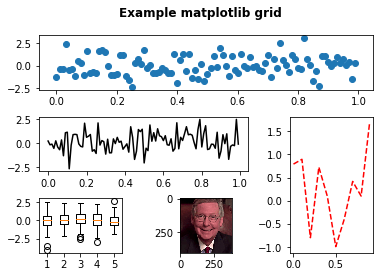

In [200]:
# COMPLEX GRID of subplots

import matplotlib.gridspec as gridspec

# 0. Create your own figure object (optional)
fig = plt.figure(1)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Example matplotlib grid", fontweight="bold")

# 1. Pre-specify your figure's grid
gs = gridspec.GridSpec(3, 3)

# 2. Individually attach each subplot to
#    cells in your grid and make subplot
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(np.arange(0, 1, 0.01), np.random.randn(100))

ax2 = fig.add_subplot(gs[1, :-1])
ax2.plot(np.arange(0, 1, 0.01), np.random.randn(100), color="k")

ax3 = fig.add_subplot(gs[1:, -1])
ax3.plot(np.arange(0, 1, 0.1), np.random.randn(10), "--", c="r")

ax4 = fig.add_subplot(gs[-1, 0])
ax4.boxplot([np.random.randn(100) for i in range(5)])

ax5 = fig.add_subplot(gs[-1, -2])
my_png = "the-big-mc.png"
img_matrix = plt.imread(my_png)
ax5.imshow(img_matrix)

plt.show()

### 3.3. Plot annotation

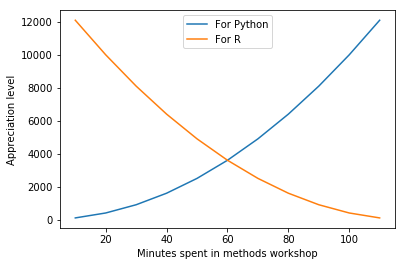

In [201]:
# LEGEND
fix, ax = plt.subplots()

x  = range(10,120,10)
y1 = map(lambda xi: xi**2, x)
y2 = y1[::-1]

ax.plot(x, y1, label="For Python")
ax.plot(x, y2, label="For R")

ax.set_ylabel("Appreciation level")
ax.set_xlabel("Minutes spent in methods workshop")

ax.legend(loc="upper center")
plt.show()

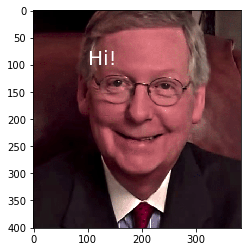

In [202]:
# TEXT ANNOTATION
fix, ax = plt.subplots()

my_png = "the-big-mc.png"
img_matrix = plt.imread(my_png)
ax.imshow(img_matrix)

ax.annotate("Hi!",              # Text string
            xy=(2,1),           # (x,y) point to annotate (only important for arrows)
            xytext=(100, 100),  # (x,y) location for text
            size=20,            # Text size
            color="white"       # Text color
)

plt.show()

### 3.4. Advanced: 3D plotting

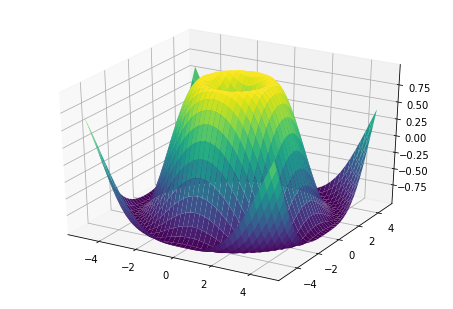

In [203]:
from matplotlib import cm                 # Custom colormaps
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax  = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
plt.show()

### 3.5. Saving plots

In [ ]:
# You can save a specific figure object that you created...

# fig.savefig("imgs/fig1.jpg")
# fig.savefig("imgs/fig2.png")
# fig.savefig("imgs/fig3.pdf")

In [207]:
# ...or you can save whatever figure is stored in `pyplot`

# plt.savefig("imgs/plt1.png")
# plt.savefig("imgs/plt2.png")
# plt.savefig("imgs/plt3.pdf")

### 3.6. Exercise:

Recall the minimum wage data from the previous section stored in the dataframe **`full_df`**. Create a grid of subplots where each subplot corresponds to a region. Within each subplot, plot the average minimum wage for Democrat states and Republican states over time.

### <div style="color:red">Solution:</div>

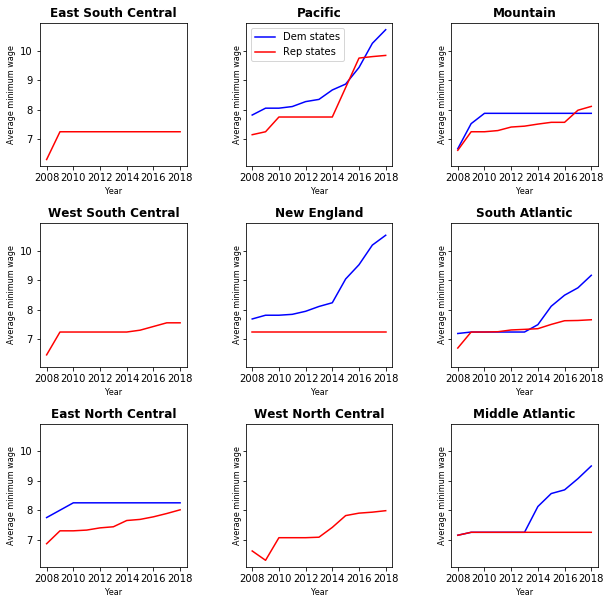

In [234]:
## 0. Create figure and plots
fig, ax_matrix = plt.subplots(3, 3, figsize=(10, 10), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

## 1. Grab all the unique regions (could also use `set`)
regions = full_df["Region"].unique()

i = 0
for row in ax_matrix:
    for ax in row:
        ## 2. Filter on unique region
        reg = regions[i]
        reg_df = full_df.ix[full_df["Region"] == reg,]
        
        ## 3. Filter on desired parties,
        ##    aggregate the average min wages
        x = range(2008, 2019)
        dy = reg_df.ix[reg_df.Control == "Dem", "2008":"2018"].mean()
        ry = reg_df.ix[reg_df.Control == "Rep", "2008":"2018"].mean()
        
        ## 4. Plot each trend line on same subplot
        ##    (i.e. top of each other)
        ax.plot(x, dy, c="b", label="Dem states")
        ax.plot(x, ry, c="r", label="Rep states")
        
        ## 5. Adjust labels, ticks, and title for each subplot
        ax.set_xlabel("Year", fontsize=8)
        ax.set_ylabel("Average minimum wage", fontsize=8)
        ax.set_xticks(range(2008, 2019, 2))
        ax.set_title(reg, fontweight="bold")
        
        ## 6. Display the default legend only for the
        ##    top center subplot
        if i == 1:
            ax.legend()
        
        ## 7. Move onto next subplot!
        i += 1

## 8. Display plot in console
plt.show()

**TIP:** The **`matplotlib`** library is useful because of it's immense *flexibility* in creating any kind of plot imaginable. However, if you prefer *convenience*, check out the [**`seaborn`**](https://seaborn.pydata.org/) library which can ingest entire dataframe objects and create beautiful plots in just a single line of code!

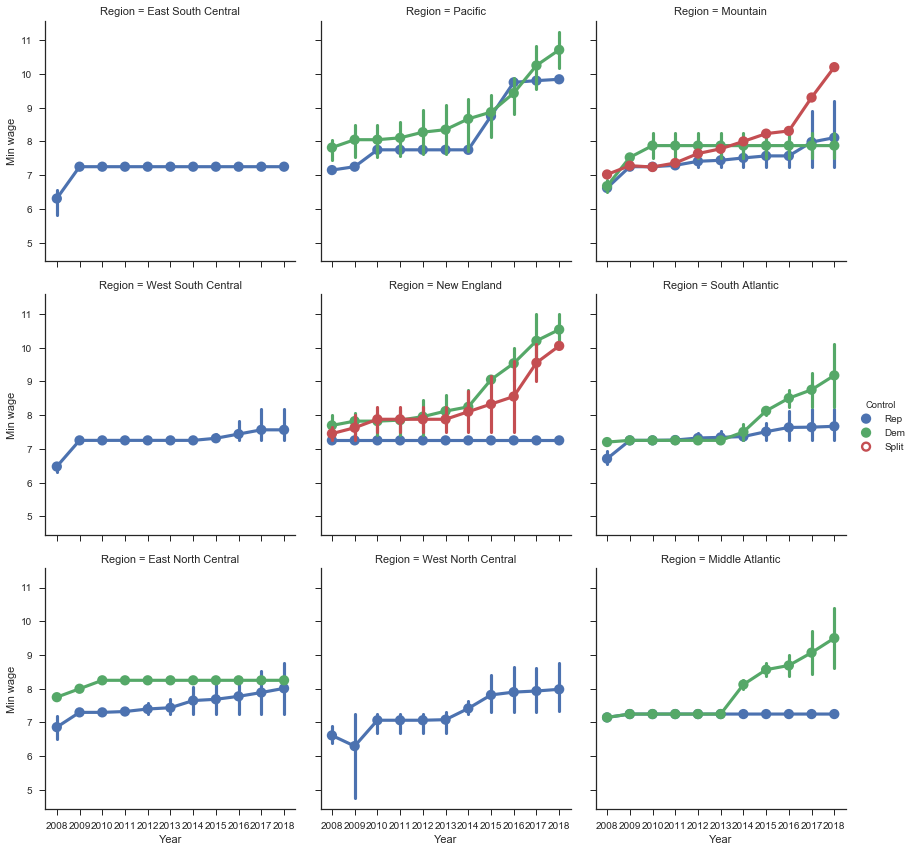

In [248]:
import seaborn as sns
sns.set_style("ticks")

# "Melt" in every year into a `Year` column
fmttd_df = pd.melt(full_df, id_vars=["StateCode", "Region", "Control"], value_vars=map(str, range(2008,2019)), var_name="Year", value_name="Min wage")

# Read to plot!
sns.factorplot(x="Year", y="Min wage", hue="Control", col="Region", data=fmttd_df, col_wrap=3)
plt.show()

### <div style="color:purple">SUMMARY</div>

- **`matplotlib`** is a highly customizable plotting library, revolving around creating **figures** and **subplots**.


- The easiest way to program is to use the "centralized" **`pyplot`** (often nick-named **`plt`**) object to call plotting functions.


- Call **`plt.show()`** to display and **`plt.savefig()`** (or **`fig.savefig()`** for a specific figure object) to save.



- If you're working with pretty standard dataframes, mostly want quick visualizations, or don't care about aesthetic, use the **`seaborn`** library which does a lot of heavy-lifting for you!
<br><br>
<div style="color:gray; text-align:right; font-weight:bold;">[BACK TO TOP  &#8593;](#toc)</div>

## 4. [`Scikit-learn`](http://scikit-learn.org/stable/): machine learning made easy<a class="anchor" id="scikit-learn"></a>

> **Scikit-learn** is a free software machine learning Python library. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

![Scikit-learn Data Science Nodes](imgs/datasci-dag-skl.png)

**`R`** equivalents: **`caret`, `randomForest`, `e1071`, `kernLab`** (all pale in comparison ☺) 



### 4.1. Machine learning primer

<h3 style="font-weight:normal">"Machine learning refers to a broad family of algorithms that *calibrate* themselves using **training** data in order to *predict* some form of output for unknown **testing** data."</h3>

Usually all machine learning pipelines involve two main phases:

&nbsp;&nbsp;&nbsp;&nbsp;**[1.] Training.** Fit model on some portion of the "known" data and evaluate model's quality using a **validation set** (remaining "known" data that is held out). Use the validation set to optimize / fine-tune the model.

&nbsp;&nbsp;&nbsp;&nbsp;**[2.] Testing.** Fit the model on *all* of the "known" data. Use the model to predict outputs on "unknown" data (supervised) *or* infer properties of all available data (unsupervised).

![ML-Specific Nodes](imgs/ml-dag.png)

Ex. **OLS regression** *fits* to a sample of observed responses and their respective observed predictor variables; it can then *predict* the response to a new set of predictor values.

Ex. **$K$-means clustering** *fits* to a sample of observations to discover $K$ underlying (i.e. no human labels!) clusters grouping each observation; it can then *infer* which of the $K$ clusters any observation would belong to.


#### 4.1.1 <u>Overview of `Scikit-learn` Modules</u>


<table>
  <tr>
    <th></th>
    <th>Description</th>
    <th>Example <br>algorithms</th>
    <th>Example<br>usage for<br>Political Science</th>
  </tr>
  <tr>
    <td><b>Classification<br>(supervised learning)</b></td>
    <td>Predicting which category <br>an object belongs to.</td>
    <td>SVM,<br>Random forest</td>
    <td>"Predict election <br>fraud (y/n) using <br>scanned ballot images."</td>
  </tr>
  <tr>
    <td><b>Regression<br>(supervised learning)</b></td>
    <td>Predicting a continuous-valued <br>response associated<br>with an object.</td>
    <td>Lasso, <br>Ridge regression</td>
    <td>"Predict treatment <br>effects of minimum<br>wage increase on<br>state unemployment."</td>
  </tr>
  <tr>
    <td><b>Clustering<br>(unsupervised learning)</b></td>
    <td>Automatically grouping <br>similar objects into sets.</td>
    <td>K-means,<br>Spectral clustering</td>
    <td>"Discover latent <br>political coalitions <br>based on Congressional <br>voting record."</td>
  </tr>
  <tr>
    <td><b>Preprocessing</b></td>
    <td>Extracting and processing <br>observed random variables <br>into learn-able "features".</td>
    <td>Text vectorization,<br>Variance scaling</td>
    <td>"Remove un-informative<br>words from political<br>speech transcripts."</td>
  </tr>
  <tr>
    <td><b>Dimensionality <br>reduction</b></td>
    <td>Reducing the number of<br>features to consider when <br>performing a prediction.</td>
    <td>Principal components <br>analysis, Linear <br>discriminant analysis</td>
    <td>"Find most predictive<br>policy preference variables<br>on survey respondent's <br>partisanship."</td>
  </tr>
  <tr>
    <td><b>Model <br>selection</b></td>
    <td>Comparing, validating and <br>choosing parameters and <br>models.</td>
    <td>Hyperparameter <br>grid search, K-fold <br>cross validation</td>
    <td>"Create the most accurate<br>prediction model for <br>state-level election <br>turnout."</td>
  </tr>
</table>


#### 4.1.2 <u>Which Algorithm do I Choose?</u>



![](http://scikit-learn.org/stable/_static/ml_map.png)

**TIP:** **`scikit-learn`** has a lot of stock datasets stored as dictionaries under the module **`sklearn.datasets`**. They are a great resource in benchmarking algorithms and testing out ideas!

### 4.2 Demo: Regression


#### *Q: Can we predict future housing prices in Boston?*

In [220]:
# 1. LOAD dataset dictionary
import sklearn
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [243]:
# 2. VIEW dataset description
print boston_dataset["DESCR"]

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [231]:
# 3. CREATE data frame
boston_df           = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df["PRICE"]  = boston_dataset.target

display(boston_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [234]:
# 4. CREATE a regression model object (OLS)
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [240]:
# 5. TRAIN model on first 400 of the housing units' features and their prices
training_features = boston_df.ix[:400, boston_dataset.feature_names]
training_prices   = boston_df.ix[:400, "PRICE"]

lm.fit(X=training_features, y=training_prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [241]:
# 6. PREDICT prices on remaining the housing units using their features
#    (validation)
test_features = boston_df.ix[400:, boston_dataset.feature_names]
test_prices   = boston_df.ix[400:, "PRICE"]

predicted_prices = lm.predict(test_features)

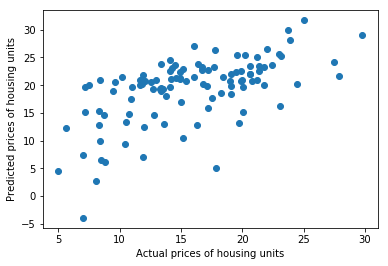

In [242]:
# 7. VISUALIZE predicted price
plt.scatter(test_prices, predicted_prices)

plt.xlabel("Actual prices of housing units")
plt.ylabel("Predicted prices of housing units")

plt.show()

In [257]:
# 8. EVALUATE model fit
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

print 'Coefficients: \n', lm.coef_
print 'Mean squared error: %.2f' % mse(test_prices, predicted_prices)
print 'Explained variance: %.2f' % r2(test_prices, predicted_prices)

Coefficients: 
[ -1.99873534e-01   4.42763141e-02   5.55407781e-02   1.73791950e+00
  -1.49715808e+01   4.85503348e+00   2.90568657e-03  -1.29621067e+00
   4.83051120e-01  -1.54201512e-02  -8.08704936e-01  -1.49681762e-03
  -5.23714094e-01]
Mean squared error: 37.50
Explained variance: -0.33


### 4.3 Demo: Classification

#### *Q: Can we recognize images of hand-written digits?*

In [317]:
# 1. LOAD dataset dictionary
from sklearn.datasets import load_digits

digits_dataset = load_digits()

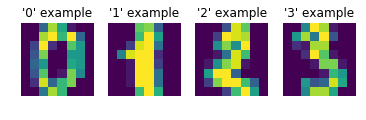

In [318]:
# 2. VIEW first four images of dataset visually
images_and_labels = list(zip(digits.images, digits.target))

for i, (img_mat, lbl) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, i+1)          # create a subplot
    plt.axis("off")                 # remove axis
    plt.imshow(img_mat)             # show image matrix
    plt.title("'%i' example" % lbl) # add title
plt.show()

In [319]:
# 3. FLATTEN images to create "feature" vectors
N = len(digits_dataset.images)
img_vectors = digits_dataset.images.reshape((N, -1))
img_labels  = digits_dataset.target

In [320]:
# 4. CREATE a classifier object (Support Vector Machine)
from sklearn.svm import SVC

clf = SVC(gamma=0.001)

In [321]:
# 5. TRAIN model on first half of images' feature vectors and their labels
clf.fit(img_vectors[:N/2], img_labels[:N/2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1]:
# 6. PREDICT labels on remaining images using their feature vectors
predicted_labels = clf.predict(img_vectors[N/2:])

NameError: name 'clf' is not defined

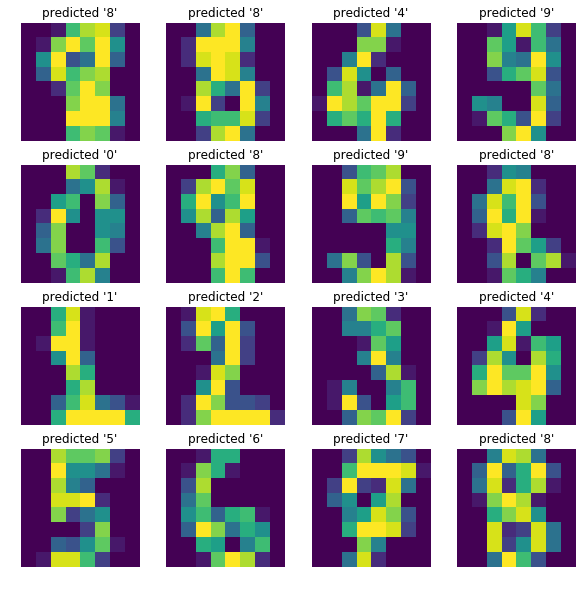

In [323]:
# 7. VISUALIZE predicted labels (first 16)
plt.figure(figsize=(10, 10))
for i, img_matrix in enumerate(digits_dataset.images[N/2:((N/2)+16)]):
    pred = predicted_labels[i]         # get corresponding prediction
    plt.subplot(4, 4, i+1)             # create a subplot
    plt.axis("off")                    # remove axis
    plt.imshow(img_matrix)             # show image matrix
    plt.title("predicted '%i'" % pred) # add title
plt.show()

In [316]:
# 8. EVALUATE accuracy
from sklearn.metrics import classification_report as report, accuracy_score as acc

print "Total accuracy: %0.2f%%" % (acc(predicted_labels, test_labels)*100)
print "Other metrics:"
print report(predicted_labels, test_labels)

NameError: name 'predicted_labels' is not defined

**TIP:** In classification, there is often a trade-off between *precision* and *recall*. Keep this in mind when you're selecting the model to use for your specific task!

### 4.4. Exercise:

Recall our minimum wage time series dataset. Using a linear model of your choice, create linear time trends on each state's yearly minimum wage. Collect the projected minimum wage for each of the states in 2019. 

Which state is predict to have the highest minimum wage? Can we trust our prediction?

### <div style="color:red">Solution:</div>

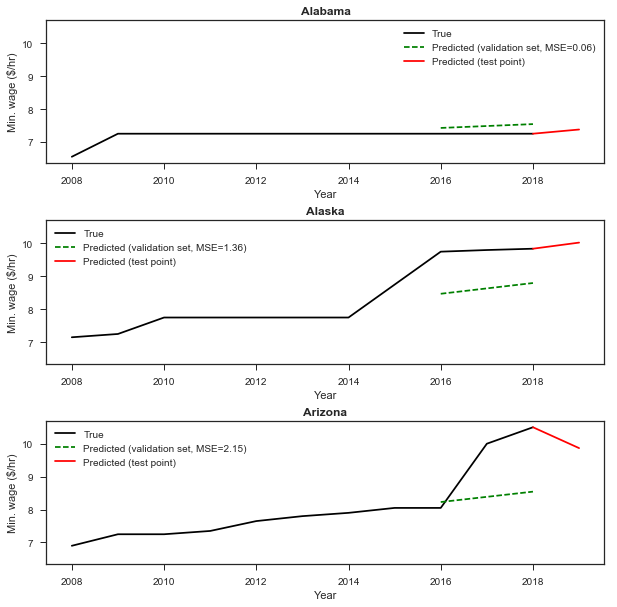

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fig, ax_list = plt.subplots(3, 1, figsize=(10, 10), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(full_df.index)):
    state_name = full_df.loc[i,"StateName"]
    
    ## 0. Init model
    lm = LinearRegression()
    
    # TRAINING
    ## 1. Fit, holding out last 3 years
    X_train = np.arange(2008, 2016).reshape(-1, 1)
    y_train_true = full_df.loc[i, "2008":"2015"].values.reshape(-1, 1)
    lm.fit(X_train, y_train_true)
    
    ## 2. Predict last 3 years' and evaluate
    X_valid = np.arange(2016, 2019).reshape(-1, 1)
    y_valid_true = full_df.loc[i, "2016":"2018"].values.reshape(-1, 1)
    y_valid_pred  = lm.predict(X_valid)
    mse = mean_squared_error(y_valid_true, y_valid_pred)
    
    # TESTING
    ## 3. Train on all available years
    X_ = np.arange(2008, 2019).reshape(-1, 1)
    y_ = full_df.loc[i, "2008":"2018"].values.reshape(-1, 1)
    lm.fit(X_, y_)
    
    ## 4. Predict 2019
    y_pred_2019 = lm.predict(2019)
    
    # VISUALIZATION
    if i < 3:
        ax_list[i].plot(X_, y_, label="True", c="k")
        ax_list[i].plot(X_valid, y_valid_pred, label="Predicted (validation set, MSE=%0.2f)" % mse, c="g", ls="--")
        ax_list[i].plot([X_[-1],2019], [y_[-1],y_pred_2019], label="Predicted (test point)", c="r")
        
        ax_list[i].set_title(state_name, fontweight="bold")
        ax_list[i].set_xlabel("Year")
        ax_list[i].set_ylabel("Min. wage ($/hr)")

        ax_list[i].legend()
    
##
## It should be very obvious that minimum wage time trends are not linear!
## As evidenced by our poor model fit (a fairly high mean square error
## on the validation set during training), we clearly cannot just use
## OLS to project future minimum wage ... using only YEAR as our input!
## Some steps to improve our predictions:
##
## * DATA. Collect state-level covariates that predict minimum wage.
##
## * MODEL. Try an alternate regression specification (e.g. Ridge,
##   Lasso, ElasticNet).
##
## * VALIDATION. Don't validate our model using just one pair of 
##   training/validation sets ... do this repeatedly (cross-validation)
##   for a better estimate of model performance.
##
## * HYPERPARAMETERS. Search for better model settings (hyperparameters)
##   in a data-driven way through cross-validation.
##

### <div style="color:purple">SUMMARY</div>

- **`scikit-learn`** is probably the most value added in specifically using Python when doing data science.


- **Supervised learning** is mostly about predicting responses; **unsupervised learning** is mostly about predicting structure.


- Lots of model diagnostic metrics available to use (e.g. **`metrics.classification_report`**, **`metrics.accuracy_score`**)


- 99% of the time when you are doing machine learning with social science data, your "off-the-shelf" model will suck at its task. So you will need to (1.) perform cross-validation as well as (2.) search for good hyperparameters (model settings). Learn to get cozy with the **`sklearn.model_selection`** module!
<br><br>
<div style="color:gray; text-align:right; font-weight:bold;">[BACK TO TOP  &#8593;](#toc)</div>

# <span style="color:gray">END OF NOTEBOOK</span>